# Scientific Workflow for Data Science Example

Author: Alexander Schindler (AIT/TU Wien)

Data analysis part from akquinet: Predicting House Prices On Kaggle: A Gentle Introduction To Data Science – [Part I](https://blog.akquinet.de/2017/09/19/predicting-house-prices-on-kaggle-part-i/) and [Part II](https://blog.akquinet.de/2017/10/25/predicting-house-prices-on-kaggle-a-gentle-introduction-to-data-science-part-ii/)

# Import Data Processing Libraries

In [1]:
# Numeric processing
import numpy as np

# in-memory data structures
import pandas as pd

# standard plotting library
import matplotlib.pyplot as plt

# prettify plots
import seaborn as sns

# embedd plots in notebook
%matplotlib inline

# Data


## House Prices: Advanced Regression Techniques

Predict sales price a house in Ames, Iowa, USA.

Link: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

![Kaggle-Datset Image](https://kaggle2.blob.core.windows.net/competitions/kaggle/5407/media/housesbanner.png "")

### Load Data

In [2]:
DATASET_PATH_TRAIN = "D:/Data/PREDICTIVE_MAINTENANCE/Kaggle/House_Prices/train.csv.gz"
DATASET_PATH_TEST  = "D:/Data/PREDICTIVE_MAINTENANCE/Kaggle/House_Prices//test.csv.gz"

DATA_DESCRIPTION_FILE = "D:/Data/PREDICTIVE_MAINTENANCE/Kaggle/House_Prices//data_description.txt"

read the csv-data-file

**Train Data**

In [3]:
data_train = pd.read_csv(DATASET_PATH_TRAIN, compression="gzip", index_col=0)

data_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Test Data**

In [4]:
data_test = pd.read_csv(DATASET_PATH_TEST, compression="gzip", index_col=0)

data_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


**Data description Lookup table**

read the data description file

In [5]:
data_description_dictionary = {}

with open(DATA_DESCRIPTION_FILE) as dsf:
    for line in dsf:
        if (line.find(":") != -1) & (line.find("\t") == -1):
            abbreviation, description = line.split(":",1)
            data_description_dictionary[abbreviation.strip()] = description.strip()

In [6]:
data_description_dictionary["YearRemodAdd"]

'Remodel date (same as construction date if no remodeling or additions)'

## Get a Feel for the Data

**Data composition**

* Data types
* Attribute names - semantically indicating?

In [7]:
# create a list of data-types for a quick analysis
data_train_types = pd.DataFrame(data_train.dtypes, columns=["type"]).reset_index()

What are the most frequent data-types?

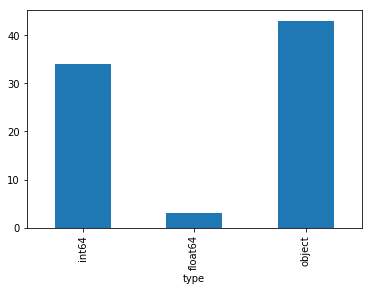

In [8]:
data_train_types.groupby("type").count().plot(kind='bar', legend=False)

### Integers

What are Int-values used for?

* counting
* measuring (areas/m²)
* annual disclosures (construction year)
* monetary values (price)

In [9]:
int_values = data_train_types[data_train_types["type"] == "int64"]["index"].values

data_train[int_values].T

Id,1,2,3,4,5,6,7,8,9,10,...,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460
MSSubClass,60,20,60,70,60,50,20,60,50,190,...,90,20,180,20,20,60,20,70,20,20
LotArea,8450,9600,11250,9550,14260,14115,10084,10382,6120,7420,...,9000,9262,3675,17217,7500,7917,13175,9042,9717,9937
OverallQual,7,6,7,7,8,5,8,7,7,5,...,5,8,5,5,7,6,6,7,5,5
OverallCond,5,8,5,5,5,5,5,6,5,6,...,5,5,5,5,5,5,6,9,6,6
YearBuilt,2003,1976,2001,1915,2000,1993,2004,1973,1931,1939,...,1974,2008,2005,2006,2004,1999,1978,1941,1950,1965
YearRemodAdd,2003,1976,2002,1970,2000,1995,2005,1973,1950,1950,...,1974,2009,2005,2006,2005,2000,1988,2006,1996,1965
BsmtFinSF1,706,978,486,216,655,732,1369,859,0,851,...,0,0,547,0,410,0,790,275,49,830
BsmtFinSF2,0,0,0,0,0,0,0,32,0,0,...,0,0,0,0,0,0,163,0,1029,290
BsmtUnfSF,150,284,434,540,490,64,317,216,952,140,...,896,1573,0,1140,811,953,589,877,0,136
TotalBsmtSF,856,1262,920,756,1145,796,1686,1107,952,991,...,896,1573,547,1140,1221,953,1542,1152,1078,1256


### Floats

What are floats used for?

* apparently used as integers
* maybe wrong interpretation by csv-reader?
* could be converted to integers? (caution! check first! every transformation could destroy information)

In [10]:
float_values = data_train_types[data_train_types["type"] == "float64"]["index"].values

data_train[float_values].T

Id,1,2,3,4,5,6,7,8,9,10,...,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460
LotFrontage,65.0,80.0,68.0,60.0,84.0,85.0,75.0,NaN,51.0,50.0,...,60.0,78.0,35.0,90.0,62.0,62.0,85.0,66.0,68.0,75.0
MasVnrArea,196.0,0.0,162.0,0.0,350.0,0.0,186.0,240.0,0.0,0.0,...,0.0,194.0,80.0,0.0,0.0,0.0,119.0,0.0,0.0,0.0
GarageYrBlt,2003.0,1976.0,2001.0,1998.0,2000.0,1993.0,2004.0,1973.0,1931.0,1939.0,...,NaN,2008.0,2005.0,NaN,2004.0,1999.0,1978.0,1941.0,1950.0,1965.0


### Objects

What are objects used for?

* Strings
* apparently categorical data
* no freetext recognizable

In [11]:
object_values = data_train_types[data_train_types["type"] == "object"]["index"].values

data_train[object_values].T

Id,1,2,3,4,5,6,7,8,9,10,...,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460
MSZoning,RL,RL,RL,RL,RL,RL,RL,RL,RM,RL,...,RL,RL,RM,RL,FV,RL,RL,RL,RL,RL
Street,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,...,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Pave,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1,IR1,Reg,IR1,Reg,Reg,...,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,...,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,...,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub
LotConfig,Inside,FR2,Inside,Corner,FR2,Inside,Inside,Corner,Inside,Corner,...,FR2,Inside,Inside,Inside,Inside,Inside,Inside,Inside,Inside,Inside
LandSlope,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,...,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl
Neighborhood,CollgCr,Veenker,CollgCr,Crawfor,NoRidge,Mitchel,Somerst,NWAmes,OldTown,BrkSide,...,NAmes,Somerst,Edwards,Mitchel,Somerst,Gilbert,NWAmes,Crawfor,NAmes,Edwards
Condition1,Norm,Feedr,Norm,Norm,Norm,Norm,Norm,PosN,Artery,Artery,...,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm


#### Check assumption that strings represent categorical data and not Freetext

* count unique values for each attribute

In [12]:
data_train[object_values].apply(lambda x : x.unique().shape[0]).sort_values(ascending=False)

Neighborhood     25
Exterior2nd      16
Exterior1st      15
SaleType          9
Condition1        9
Condition2        8
HouseStyle        8
RoofMatl          8
Functional        7
BsmtFinType1      7
GarageType        7
BsmtFinType2      7
RoofStyle         6
Heating           6
SaleCondition     6
Electrical        6
FireplaceQu       6
GarageQual        6
GarageCond        6
Foundation        6
MasVnrType        5
BldgType          5
LotConfig         5
BsmtQual          5
MSZoning          5
ExterCond         5
BsmtCond          5
BsmtExposure      5
HeatingQC         5
MiscFeature       5
Fence             5
LotShape          4
LandContour       4
ExterQual         4
GarageFinish      4
KitchenQual       4
PoolQC            4
PavedDrive        3
LandSlope         3
Alley             3
Utilities         2
CentralAir        2
Street            2
dtype: int64

**Example of categorical Data**

In [13]:
data_train.Exterior2nd.unique()

array(['VinylSd', 'MetalSd', 'Wd Shng', 'HdBoard', 'Plywood', 'Wd Sdng',
       'CmentBd', 'BrkFace', 'Stucco', 'AsbShng', 'Brk Cmn', 'ImStucc',
       'AsphShn', 'Stone', 'Other', 'CBlock'], dtype=object)

# Data Exploration and Visualization

### Data Value Ranges

* how are the value ranges within the attributes?
* how are the value ranges between the attributes?

In [14]:
data_train[int_values.tolist() + float_values.tolist()].describe().T.sort_values("mean")

,count,mean,std,min,25%,50%,75%,max
BsmtHalfBath,1460.0,0.057534,0.238753,0.0,0.00,0.0,0.00,2.0
HalfBath,1460.0,0.382877,0.502885,0.0,0.00,0.0,1.00,2.0
BsmtFullBath,1460.0,0.425342,0.518911,0.0,0.00,0.0,1.00,3.0
Fireplaces,1460.0,0.613014,0.644666,0.0,0.00,1.0,1.00,3.0
KitchenAbvGr,1460.0,1.046575,0.220338,0.0,1.00,1.0,1.00,3.0
FullBath,1460.0,1.565068,0.550916,0.0,1.00,2.0,2.00,3.0
GarageCars,1460.0,1.767123,0.747315,0.0,1.00,2.0,2.00,4.0
PoolArea,1460.0,2.758904,40.177307,0.0,0.00,0.0,0.00,738.0
BedroomAbvGr,1460.0,2.866438,0.815778,0.0,2.00,3.0,3.00,8.0
3SsnPorch,1460.0,3.409589,29.317331,0.0,0.00,0.0,0.00,508.0


**Range of the entire data-space - only independant values**

In [15]:
mask = int_values.tolist() + float_values.tolist()
mask.remove("SalePrice")

data_train[mask].describe().T.describe()[["min", "max", "mean"]]

,min,max,mean
count,36.000000,36.000000,36.000000
mean,270.611111,7627.666667,682.486062
std,637.373776,35710.992874,1814.787301
min,0.000000,2.000000,0.057534
25%,0.000000,9.750000,3.273801
50%,0.000000,562.000000,45.019178
75%,6.500000,2010.000000,496.545205
max,2006.000000,215245.000000,10516.828082


**Frequency Distribution of target variable**

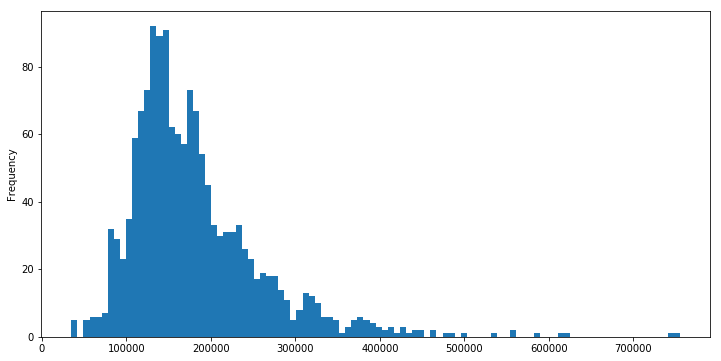

In [16]:
data_train.SalePrice.plot(kind='hist', bins=100, figsize=(12,6));

# Missing Values

Visualize with Seaborn Heatmap

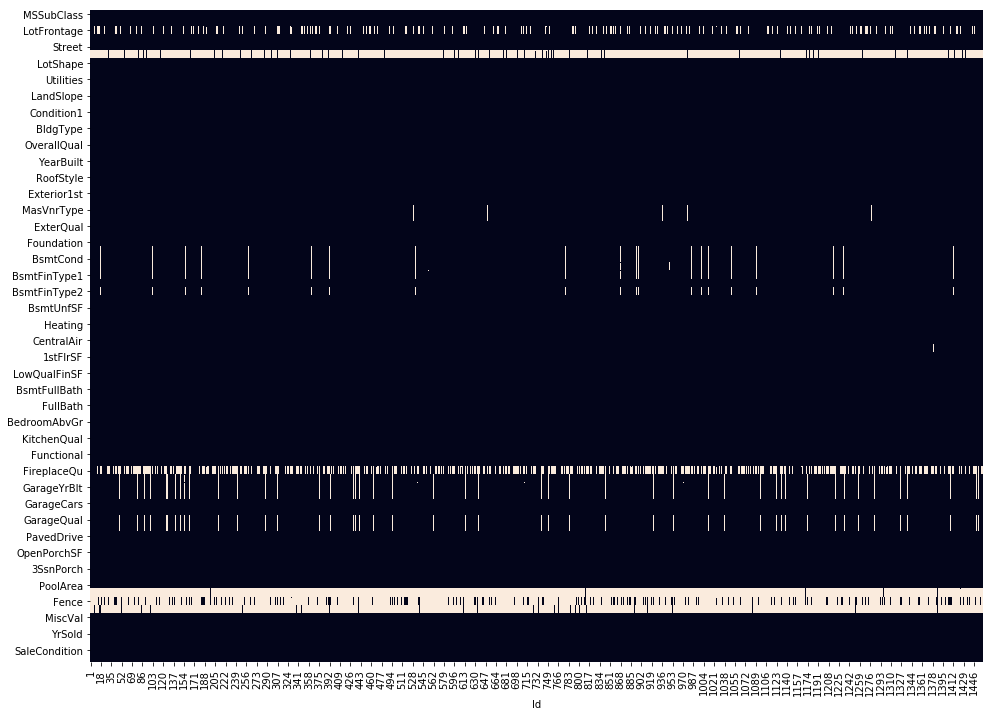

In [17]:
fig, ax = plt.subplots(figsize=(16,12))
sns.heatmap(data_train.T.isnull(), cbar=False);

Visualize with [missingno](https://github.com/ResidentMario/missingno) library

In [18]:
import missingno as msno

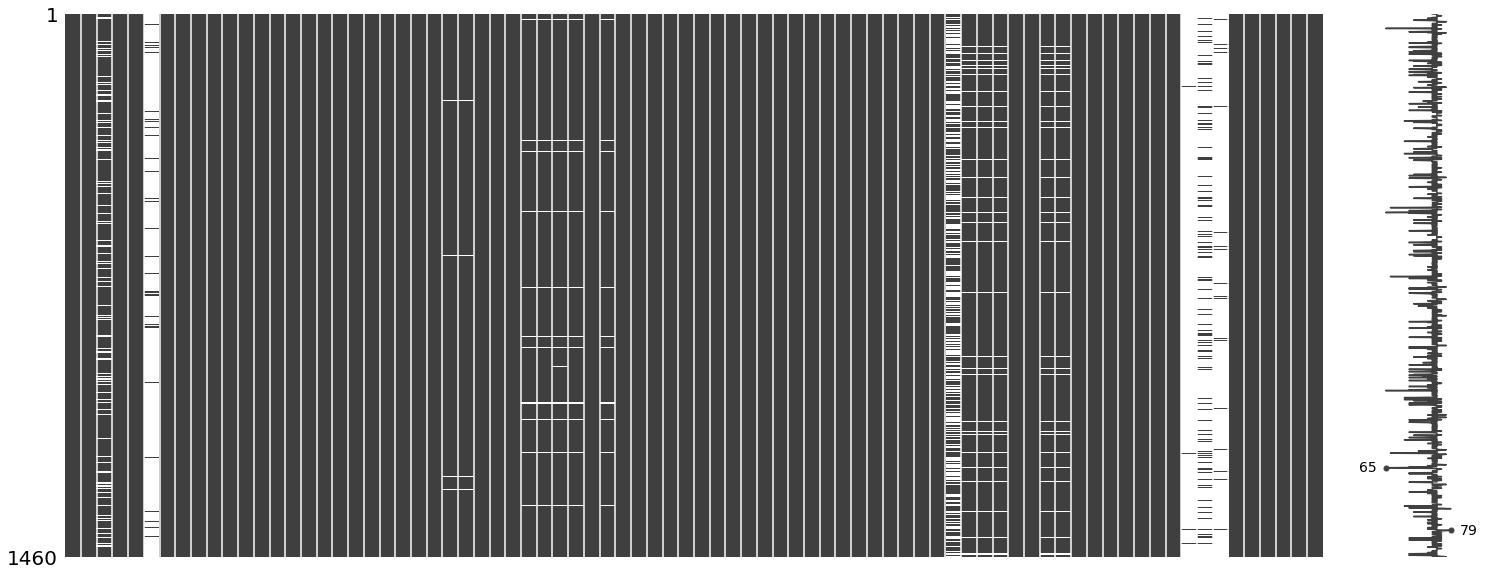

In [19]:
msno.matrix(data_train);

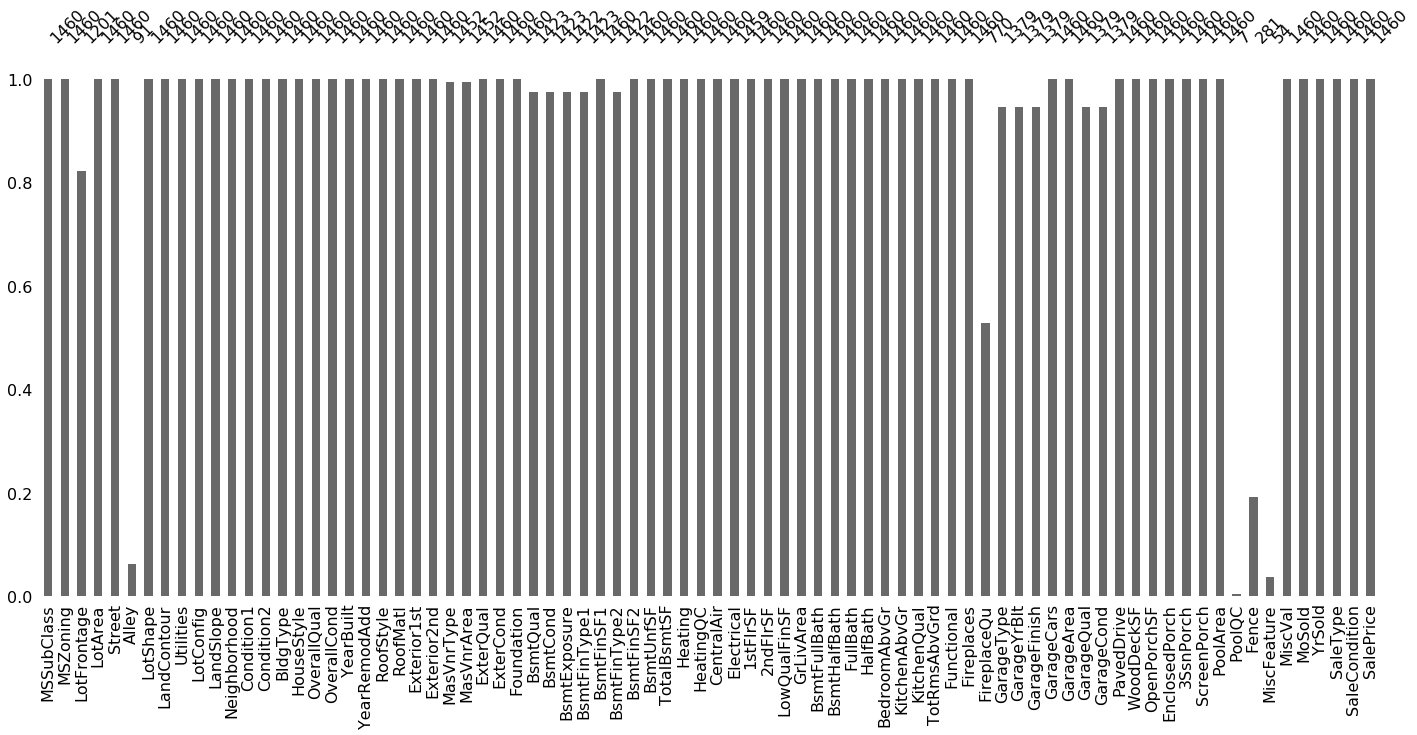

In [20]:
msno.bar(data_train);

In [65]:
attributes_with_missing_data = data_train.isnull().sum(axis=0)
attributes_with_missing_data = attributes_with_missing_data[attributes_with_missing_data > 0]
attributes_with_missing_data = pd.DataFrame(attributes_with_missing_data, columns=["num_nans"])
attributes_with_missing_data.sort_values("num_nans", ascending=False)

,num_nans
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageType,81
GarageYrBlt,81
GarageFinish,81
GarageQual,81


In [ ]:
attributes_with_missing_data_types = data_train_types.set_index("index").loc[attributes_with_missing_data.index]
attributes_with_missing_data       = attributes_with_missing_data.join(attributes_with_missing_data_types)

In [69]:
attributes_with_missing_data.sort_values(["type", "num_nans"], ascending=True)

,num_nans,type
MasVnrArea,8,float64
GarageYrBlt,81,float64
LotFrontage,259,float64
Electrical,1,object
MasVnrType,8,object
BsmtQual,37,object
BsmtCond,37,object
BsmtFinType1,37,object
BsmtExposure,38,object
BsmtFinType2,38,object


### Missing Values - Conclusion

* Most of attributes with missing values are categorical variables
  * no processing required => will be solved implicetly by processing categorical values
* 3 nnumerical variables with missing values
  * 2 area measures, 1 temporal

# Missing Value Handling

These numerical values need to be handled:

In [70]:
attributes_with_missing_data[attributes_with_missing_data["type"] == "float64"].sort_values(["type", "num_nans"], ascending=True)

,num_nans,type
MasVnrArea,8,float64
GarageYrBlt,81,float64
LotFrontage,259,float64


### LotFrontage

In [72]:
data_description_dictionary["LotFrontage"]

'Linear feet of street connected to property'

This description is problematic.

* Does a missing values indicate
  * there is no connected path available (length=0)
  * this value has not been sampled / is unkown

**Check Distribution**

* No 0-valued entries.
  * unlikely that NAN represents "no path available"
* shortest path = 21 feet, average 70 feet.

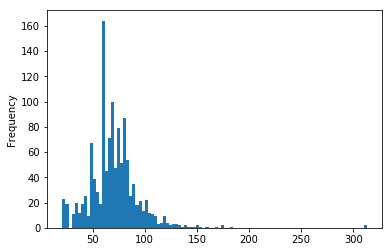

In [76]:
data_train.LotFrontage.plot(kind='hist', bins=100);

In [77]:
data_train.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

**Decission**

* Fill missing data with mean values

In [81]:
data_train["LotFrontage"].fillna(data_train.LotFrontage.mean(), inplace=True)

# the resulting values will be floats, while the original values are integers
# in this example this does not influence further calculations

### GarageYrBlt

In [82]:
data_description_dictionary["GarageYrBlt"]

'Year garage was built'

Again, this description is ambigious:

* does NAN correspond with the absence of a garage?
* or is this information not available?

**Cross-check with other attributes**

In [85]:
garage_attributes = data_train.columns[data_train.columns.str.lower().str.contains("garage")].values
garage_attributes

array(['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond'], dtype=object)

In [87]:
attributes_with_missing_data.loc[garage_attributes]

C:\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


,num_nans,type
GarageType,81.0,object
GarageYrBlt,81.0,float64
GarageFinish,81.0,object
GarageCars,NaN,NaN
GarageArea,NaN,NaN
GarageQual,81.0,object
GarageCond,81.0,object


In [90]:
data_train[data_train.GarageArea == 0][garage_attributes]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
Id,,,,,,,
40,NaN,NaN,NaN,0,0,NaN,NaN
49,NaN,NaN,NaN,0,0,NaN,NaN
79,NaN,NaN,NaN,0,0,NaN,NaN
89,NaN,NaN,NaN,0,0,NaN,NaN
90,NaN,NaN,NaN,0,0,NaN,NaN
100,NaN,NaN,NaN,0,0,NaN,NaN
109,NaN,NaN,NaN,0,0,NaN,NaN
126,NaN,NaN,NaN,0,0,NaN,NaN
128,NaN,NaN,NaN,0,0,NaN,NaN


In [91]:
data_train[data_train.GarageArea == 0][garage_attributes].shape

(81, 7)

**Conclusion**

* NAN values correspond with the absence of a garage
* No problem for the corresponding categorical attributes
* How to model the construction year of a missing garage?

In [32]:
data_description_dictionary["MiscFeature"]

'Miscellaneous feature not covered in other categories'

In [33]:
data_train.PoolQC.value_counts(dropna=False)

NaN    1453
Gd        3
Fa        2
Ex        2
Name: PoolQC, dtype: int64

In [34]:
data_train.Fence.value_counts(dropna=False)

NaN      1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

In [ ]:
data_train.PoolQC.value_counts().plot(kind='bar');

### Missing Data Strategies

* Delete
* Impute
* Leave

#### Delete

In [31]:
del data_train["PoolQC"]
del data_train["MiscFeature"]

#### Impute

In [32]:
float_val_columns = data_train.select_dtypes(include = [np.float64]).columns

In [33]:
catfeats_fillnamode = \
    ['Electrical', 'MasVnrType', 'MSZoning', 'Functional', 'Utilities',
     'Exterior1st', 'Exterior2nd', 'KitchenQual', 'SaleType']
 
data_train.loc[:, catfeats_fillnamode] = \
    data_train[catfeats_fillnamode].fillna(data_train[catfeats_fillnamode].mode().iloc[0])
 
numfeats_fillnamedian = ['MasVnrArea', 'LotFrontage', 'GarageYrBlt']
 
data_train.loc[:, numfeats_fillnamedian] = data_train[numfeats_fillnamedian].fillna(data_train[numfeats_fillnamedian].median())

In [34]:
data_train.isnull().sum(axis=0).sort_values(ascending=False).head(20)

Alley           2721
Fence           2348
SalePrice       1459
FireplaceQu     1420
GarageQual       159
GarageFinish     159
GarageCond       159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
BsmtFullBath       2
BsmtHalfBath       2
BsmtFinSF1         1
BsmtFinSF2         1
GarageCars         1
BsmtUnfSF          1
GarageArea         1
dtype: int64

### Categorical Values

In [11]:
data_description_dictionary["Foundation"]

'Type of foundation'

In [12]:
data_train.Foundation.value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

* poured concrete (PConc) 
* cinderblock (CBlock)

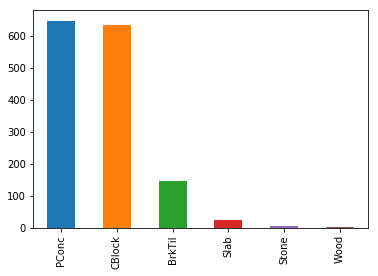

In [13]:
data_train.Foundation.value_counts().plot(kind='bar');

## Bivariate analysis

### Numerical Variables

In [14]:
data_description_dictionary["GrLivArea"]

'Above grade (ground) living area square feet'

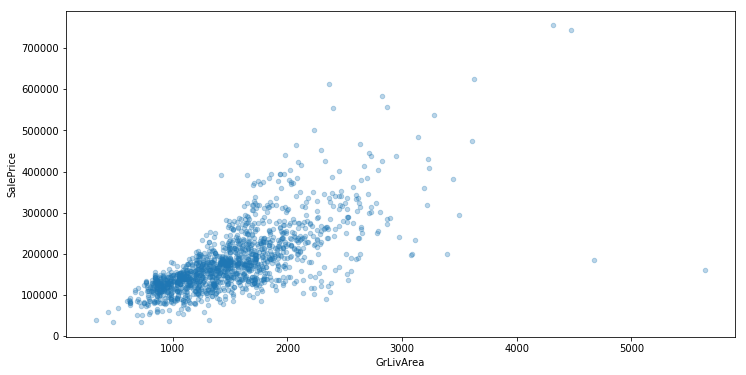

In [15]:
data_train.plot(kind='scatter', x="GrLivArea", y="SalePrice", alpha=0.3, figsize=(12,6));

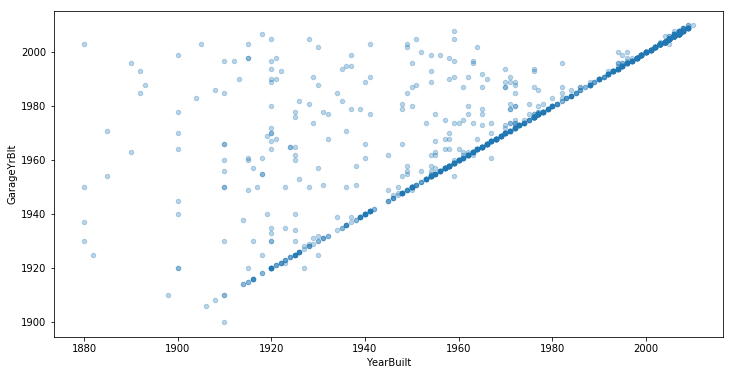

In [16]:
data_train.plot(kind='scatter', x="YearBuilt", y="GarageYrBlt", alpha=0.3, figsize=(12,6));

### Categorical Values

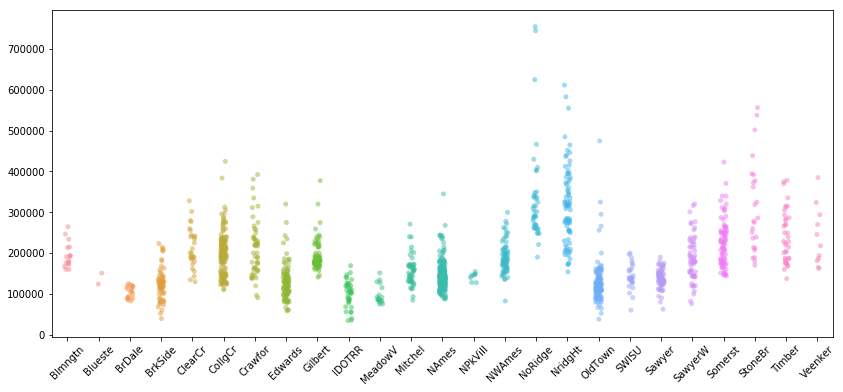

In [17]:
fig, ax = plt.subplots(figsize=(14,6))
sns.stripplot(x      = data_train.Neighborhood.values, 
              y      = data_train.SalePrice.values,
              order  = np.sort(data_train.Neighborhood.unique()),
              jitter = 0.1, 
              alpha  = 0.5, 
              ax     = ax);
 
plt.xticks(rotation=45);

Sort by mean sales price per neighborhood

In [18]:
Neighborhood_meanSP = data_train.groupby('Neighborhood')['SalePrice'].mean()

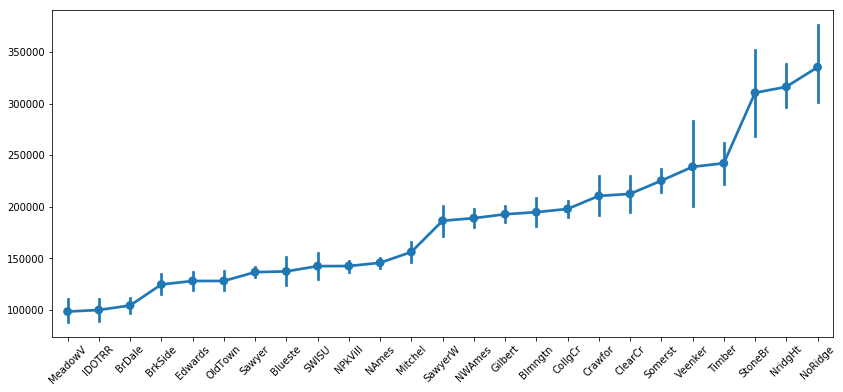

In [19]:
fig, ax = plt.subplots(figsize=(14,6))
sns.pointplot(x      = data_train.Neighborhood.values, 
              y      = data_train.SalePrice.values,
              order  = Neighborhood_meanSP.sort_values().index)
 
plt.xticks(rotation=45);

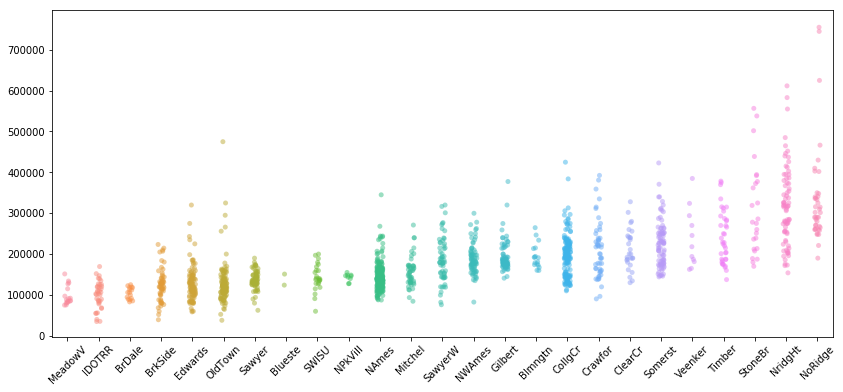

In [20]:
fig, ax = plt.subplots(figsize=(14,6))
sns.stripplot(x      = data_train.Neighborhood.values, 
              y      = data_train.SalePrice.values,
              order  = Neighborhood_meanSP.sort_values().index,
              jitter = 0.1, 
              alpha  = 0.5, 
              ax     = ax);
 
plt.xticks(rotation=45);

### Non-Numerical Values

In [35]:
data_train.select_dtypes(include = [object]).columns

Index([u'Alley', u'BldgType', u'BsmtCond', u'BsmtExposure', u'BsmtFinType1',
       u'BsmtFinType2', u'BsmtQual', u'CentralAir', u'Condition1',
       u'Condition2', u'Electrical', u'ExterCond', u'ExterQual',
       u'Exterior1st', u'Exterior2nd', u'Fence', u'FireplaceQu', u'Foundation',
       u'Functional', u'GarageCond', u'GarageFinish', u'GarageQual',
       u'GarageType', u'Heating', u'HeatingQC', u'HouseStyle', u'KitchenQual',
       u'LandContour', u'LandSlope', u'LotConfig', u'LotShape', u'MSZoning',
       u'MasVnrType', u'Neighborhood', u'PavedDrive', u'RoofMatl',
       u'RoofStyle', u'SaleCondition', u'SaleType', u'Street', u'Utilities'],
      dtype='object')

#### Ordinal features

In [36]:
data_train.LotShape.value_counts(dropna=False)

Reg    1859
IR1     968
IR2      76
IR3      16
Name: LotShape, dtype: int64

In [37]:
data_train.LotShape = data_train.LotShape.replace({'Reg':0, 'IR1':1, 'IR2':2, 'IR3':3})

In [38]:
data_train.LotShape.value_counts()

0    1859
1     968
2      76
3      16
Name: LotShape, dtype: int64

#### Categorical features

In [39]:
data_train.Neighborhood.head(15)

Id
1     CollgCr
2     Veenker
3     CollgCr
4     Crawfor
5     NoRidge
6     Mitchel
7     Somerst
8      NWAmes
9     OldTown
10    BrkSide
11     Sawyer
12    NridgHt
13     Sawyer
14    CollgCr
15      NAmes
Name: Neighborhood, dtype: object

In [41]:
pd.Series(pd.factorize(data_train.Neighborhood.head(15)))[0]

array([ 0,  1,  0,  2,  3,  4,  5,  6,  7,  8,  9, 10,  9,  0, 11], dtype=int64)

#### Dummy encoding (aka one-hot encoding)

In [44]:
pd.get_dummies(data_train.Neighborhood, drop_first=True).head(15)

,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,...,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


# Preparing Feature-Space

In [47]:
data_train.shape

(2919, 78)

In [45]:
one_hot_encoded_values = []

for column in data_train.select_dtypes(include = [object]).columns:

    encoded_column = pd.get_dummies(data_train.Neighborhood, drop_first=True)
    encoded_column.columns = ["%s.%s" % ("Neighborhood", cn) for cn in encoded_column.columns]
    
    one_hot_encoded_values.append(encoded_column)

In [46]:
feature_space = pd.concat(one_hot_encoded_values, axis=1)
feature_space.shape

(2919, 960)

In [48]:
data_train.dtypes.value_counts()

object     40
int64      26
float64    12
dtype: int64

In [49]:
columns = []

columns.extend(data_train.select_dtypes(include = ["int64"]).columns)
columns.extend(data_train.select_dtypes(include = ["float64"]).columns)

In [50]:
final_data = data_train[columns].join(feature_space)
final_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,EnclosedPorch,Fireplaces,FullBath,GrLivArea,HalfBath,KitchenAbvGr,...,Neighborhood.NoRidge,Neighborhood.NridgHt,Neighborhood.OldTown,Neighborhood.SWISU,Neighborhood.Sawyer,Neighborhood.SawyerW,Neighborhood.Somerst,Neighborhood.StoneBr,Neighborhood.Timber,Neighborhood.Veenker
Id,,,,,,,,,,,,,,,,,,,,,
1,856,854,0,3,0,0,2,1710,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1262,0,0,3,0,1,2,1262,0,1,...,0,0,0,0,0,0,0,0,0,1
3,920,866,0,3,0,1,2,1786,1,1,...,0,0,0,0,0,0,0,0,0,0
4,961,756,0,3,272,1,1,1717,0,1,...,0,0,0,0,0,0,0,0,0,0
5,1145,1053,0,4,0,1,2,2198,1,1,...,1,0,0,0,0,0,0,0,0,0


**Handle missing values for *SalePrice* **

In [51]:
mask = ~final_data.SalePrice.isnull()

final_data = final_data[mask]
data_train = data_train[mask]

# Define model for prediction

## Validation using StratifiedShuffleSplit

In [52]:
from sklearn.model_selection import StratifiedShuffleSplit

In [53]:
# define Splitter
sss = StratifiedShuffleSplit(n_splits  = 1, 
                             test_size = 0.1)

# split train/test set
split = sss.split(final_data, data_train.Neighborhood)

# workaround - function is defined as generator - cast to list
train_idx, test_idx = list(split)[0]

In [54]:
print "Train-data", final_data.iloc[train_idx].shape
print "Test-data",  final_data.iloc[test_idx].shape

Train-data (1314, 998)
Test-data (146, 998)


In [55]:
dependent_variable = final_data.columns == "SalePrice"

# train split
x_train = final_data.iloc[train_idx, ~dependent_variable]
y_train = final_data.iloc[train_idx, dependent_variable]

# test split
x_test  = final_data.iloc[test_idx, ~dependent_variable]
y_test  = final_data.iloc[test_idx, dependent_variable]

## Training a simple model

In [56]:
from sklearn.linear_model import LinearRegression

Define and fit model

In [57]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

predict test data

In [58]:
y_pred = regressor.predict(x_test)

#### Estimating Model quality

In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

Calculate error

In [60]:
mean_absolute_error(y_test, y_pred)

18618.071418112439

**Refine Model**

In [61]:
from sklearn.decomposition import PCA

Selecting Principal Components

In [62]:
pca = PCA(n_components=500, svd_solver='full')
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=500, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)

Fit new model on selected features

In [63]:
regressor_pca = LinearRegression()
regressor_pca.fit(pca.transform(x_train), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

predict test data

In [64]:
y_pred_pca = regressor_pca.predict(pca.transform(x_test))

Calculate error

In [65]:
mean_absolute_error(y_test, y_pred_pca)

18748.069230004687

#### Model Fitting / Parameter Selection

In [66]:
from progressbar import ProgressBar

In [67]:
eval_results = []

pbar = ProgressBar()

for n_comp in pbar(np.arange(10,300,10)):
    
    # PCA
    pca = PCA(n_components=n_comp, svd_solver='full')
    pca.fit(x_train)
    
    # fit model
    regressor_pca = LinearRegression()
    regressor_pca.fit(pca.transform(x_train), y_train)
    
    # predict
    y_pred_pca = regressor_pca.predict(pca.transform(x_test))
    
    # calc metric
    eval_results.append([n_comp, mean_squared_error(y_test, y_pred_pca)])

100% (29 of 29) |#########################| Elapsed Time: 0:00:18 Time: 0:00:18


In [68]:
# format result data
eval_results = pd.DataFrame(eval_results, columns=["n_comp", "MSE"])
eval_results = eval_results.set_index("n_comp")

Plot results

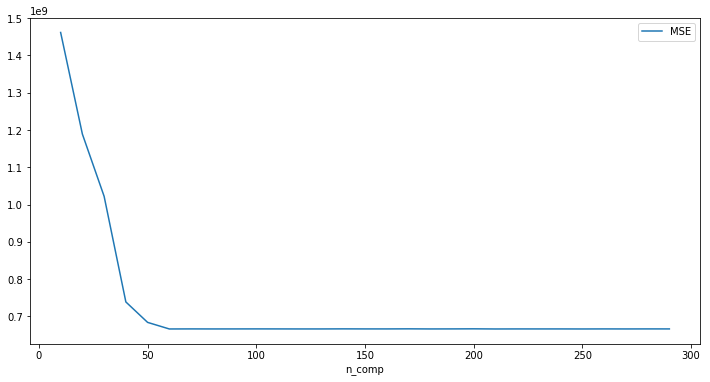

In [69]:
eval_results.plot(figsize=(12,6));

In [70]:
eval_results.idxmin()

MSE    210
dtype: int64

# Visual Exploration

using PCA to project high dimensional data onto a 2D space

In [71]:
pca = PCA(n_components=2, svd_solver='full')
X_pca = pca.fit_transform(final_data)

plotting transformation

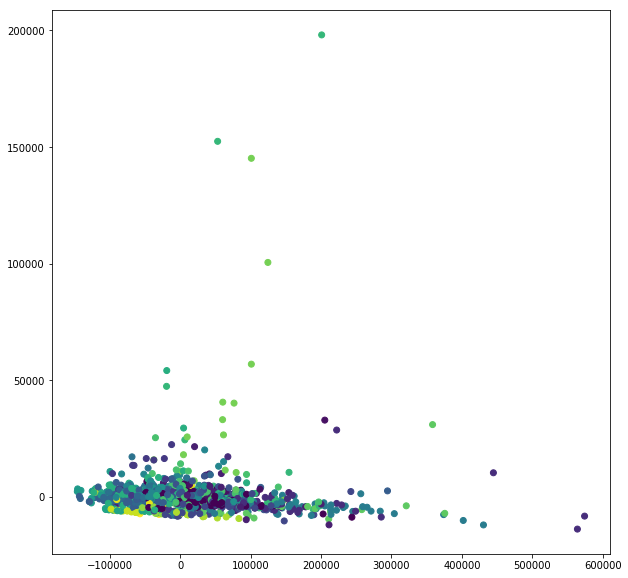

In [72]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(X_pca[:,0], X_pca[:,1], c=data_train.Neighborhood.factorize()[0]);

Using T-SNE

In [73]:
from sklearn.manifold import TSNE

Normalize Data

In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(final_data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [75]:
X_embedded = TSNE(n_components=2, n_iter=1000, verbose=2).fit_transform(scaler.transform(final_data))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1460 samples in 0.053s...
[t-SNE] Computed neighbors for 1460 samples in 3.398s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1460
[t-SNE] Computed conditional probabilities for sample 1460 / 1460
[t-SNE] Mean sigma: 2.833847
[t-SNE] Computed conditional probabilities in 0.047s
[t-SNE] Iteration 50: error = 59.8007698, gradient norm = 0.1894817 (50 iterations in 2.984s)
[t-SNE] Iteration 100: error = 52.1585312, gradient norm = 0.1254234 (50 iterations in 1.970s)
[t-SNE] Iteration 150: error = 49.8339806, gradient norm = 0.1054153 (50 iterations in 1.950s)
[t-SNE] Iteration 200: error = 48.8232613, gradient norm = 0.1080190 (50 iterations in 1.870s)
[t-SNE] Iteration 250: error = 48.3126526, gradient norm = 0.0957583 (50 iterations in 1.802s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.312653
[t-SNE] Iteration 300: error = 0.6316909, gradient norm = 0.0011414 (50 iterations in 1.603s)

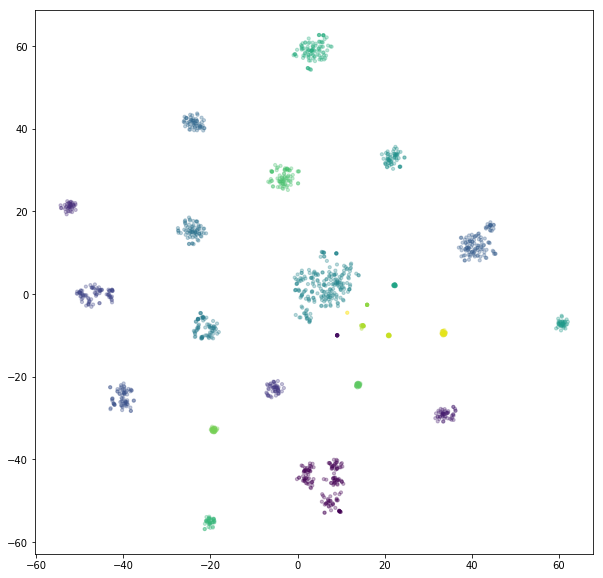

In [76]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(X_embedded[:,0], X_embedded[:,1], c=data_train.Neighborhood.factorize()[0], alpha=0.3, s=10);